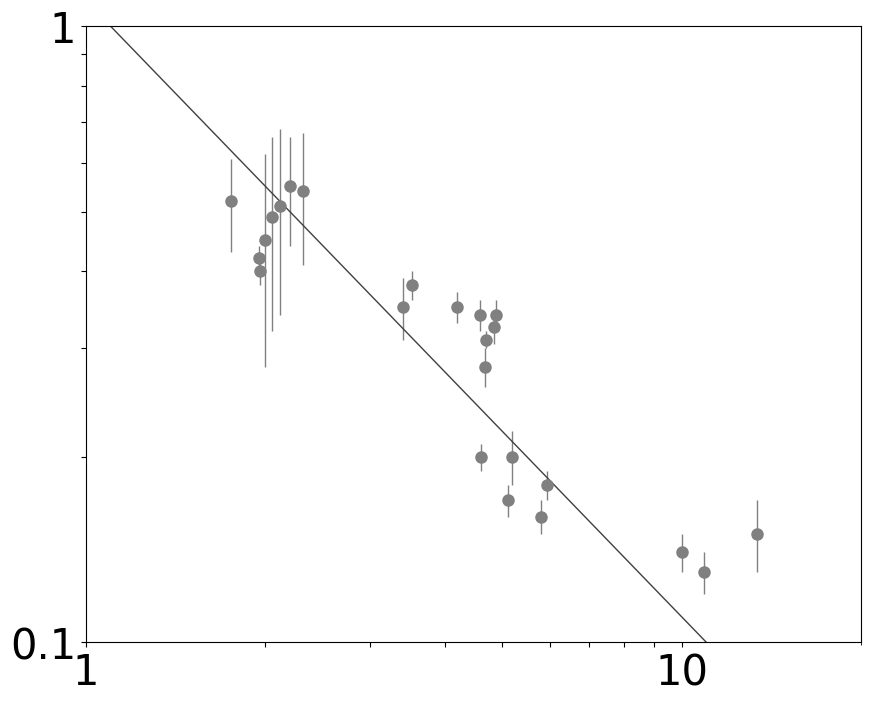

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# 读取散点图数据和误差
df_data = pd.read_csv("./fig4.1/data.csv")
df_error = pd.read_csv("./fig4.1/err.csv")
x = df_data["x"]
y = df_data["y"]
y_err = df_error["y"]

# 读取理论线数据
df_theory = pd.read_csv("./fig4.1/theory.csv")
x_theory = df_theory["x"]
y_theory = df_theory["y"]

plt.figure(figsize=(10, 8)) 
# 绘制散点图和误差棒
plt.errorbar(
    x, y,
    yerr=y_err,      # y轴误差
    fmt="o",         # 数据点样式（圆圈）
    color="#808080", # 数据点和误差棒颜色
    ecolor="#808080",# 误差棒颜色
    elinewidth=1,    # 误差棒线宽
    capsize=0,       # 误差棒顶端横线长度
    markersize=8,    # 调整数据点大小
    label="Data with Error"  # 添加标签用于图例
)

# 绘制理论线
plt.plot(
    x_theory, y_theory,      # 理论线的 X 和 Y 数据
    color="#404040",            # 线条颜色
    linestyle="-",           # 线条样式（实线）
    linewidth=1,             # 线条粗细
)

# 设置对数刻度
plt.xscale("log")
plt.yscale("log")

# 设置刻度
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ["1", "", "", "", "", "", "", "", "", "10"], fontsize=30)
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], ["0.1", "", "", "", "", "", "", "", "", "1"], fontsize=30)

plt.xlim(1, 20)  # X 轴范围：1 到 10
plt.ylim(0.1, 1) # Y 轴范围：0.1 到 1

plt.savefig("scatter_with_theory4.1.svg", format="svg", bbox_inches="tight")

plt.show()

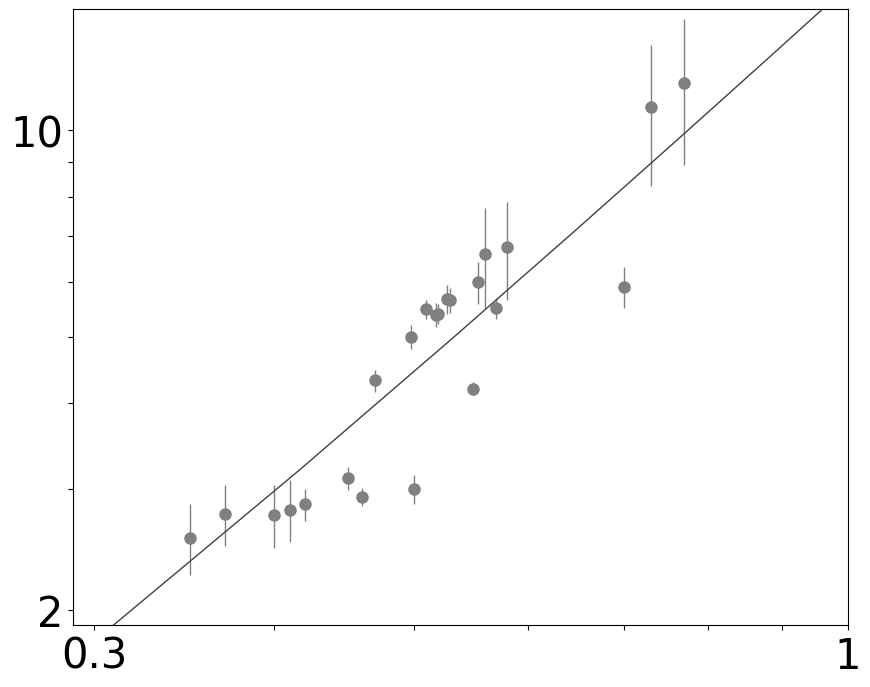

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# 读取散点图数据和误差
df_data = pd.read_csv("./fig4.2/data.csv")
df_error = pd.read_csv("./fig4.2/err.csv")
x = df_data["x"]
y = df_data["y"]
y_err = df_error["y"]

# 读取理论线数据
df_theory = pd.read_csv("./fig4.2/theory.csv")
x_theory = df_theory["x"]
y_theory = df_theory["y"]

plt.figure(figsize=(10, 8)) 
# 绘制散点图和误差棒
plt.errorbar(
    x, y,
    yerr=y_err,      # y轴误差
    fmt="o",         # 数据点样式（圆圈）
    color="#808080", # 数据点和误差棒颜色
    ecolor="#808080",# 误差棒颜色
    elinewidth=1,    # 误差棒线宽
    capsize=0,       # 误差棒顶端横线长度
    markersize=8,    # 调整数据点大小
)

# 绘制理论线
plt.plot(
    x_theory, y_theory,      # 理论线的 X 和 Y 数据
    color="#404040",            # 线条颜色
    linestyle="-",           # 线条样式（实线）
    linewidth=1,             # 线条粗细
)

# 设置对数刻度
plt.xscale("log")
plt.yscale("log")

# 设置刻度
plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], ["", "", "0.3", "", "", "", "", "", "", "1"], fontsize=30)
plt.yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], ["", "2", "", "", "", "", "", "", "", "10"], fontsize=30)

plt.xlim(0.29, 1)  # X 轴范围：1 到 10
plt.ylim(1.9, 15) # Y 轴范围：0.1 到 1

plt.savefig("scatter_with_theory4.2.svg", format="svg", bbox_inches="tight")

plt.show()

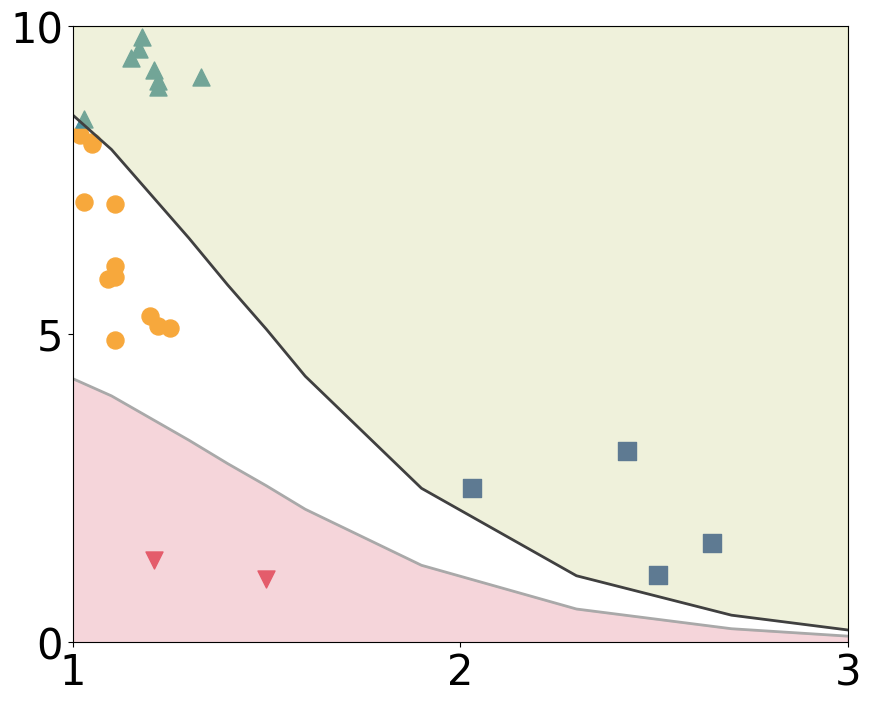

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 读取折线图数据
df_line1 = pd.read_csv("./fig4.3/theory1.csv")
x_line1 = df_line1["x"]
y_line1 = df_line1["y"]
df_line2 = pd.read_csv("./fig4.3/theory2.csv")
x_line2 = df_line2["x"]
y_line2 = df_line2["y"]

# 读取 XLS 文件数据
df_points = pd.read_excel("./fig4.3/PhaseDiagram.xls")
x_points = df_points["beta"]  # X 轴对应 beta 列
y_points = df_points["gamma"] # Y 轴对应 gamma 列

plt.figure(figsize=(10, 8)) 
# 绘制第一个折线图
plt.plot(
    x_line1, y_line1,
    color="#A9A9A9",
    linestyle="-",
    linewidth=2,
)

# 绘制第二个折线图
plt.plot(
    x_line2, y_line2,
    color="#404040",
    linestyle="-",
    linewidth=2,
)

# 计算每个数据点在两条折线上的 Y 值（通过插值）
y_line1_at_points = np.interp(x_points, x_line1, y_line1)
y_line2_at_points = np.interp(x_points, x_line2, y_line2)

# 分组：X 轴大于 2 的数据点
mask_x_gt_2 = x_points > 2
x_gt_2 = x_points[mask_x_gt_2]
y_gt_2 = y_points[mask_x_gt_2]

# 分组：X 轴小于等于 2 的数据点
mask_x_leq_2 = x_points <= 2
x_leq_2 = x_points[mask_x_leq_2]
y_leq_2 = y_points[mask_x_leq_2]
y_line1_leq_2 = y_line1_at_points[mask_x_leq_2]
y_line2_leq_2 = y_line2_at_points[mask_x_leq_2]

# 为 X 轴小于等于 2 的数据点分配形状
mask_below_theory1 = (y_leq_2 < y_line1_leq_2)
mask_between_theories = (y_leq_2 >= y_line1_leq_2) & (y_leq_2 < y_line2_leq_2)
mask_above_theory2 = (y_leq_2 >= y_line2_leq_2)

# 绘制 X 轴小于等于 2 的数据点（按形状区分）
# 低于 theory1：圆形
plt.scatter(
    x_leq_2[mask_below_theory1], y_leq_2[mask_below_theory1],
    color="#E8525F",          # 统一颜色
    marker="v",              # 圆形
    s=150,                    # 数据点大小
)

# 在 theory1 和 theory2 之间：三角形
plt.scatter(
    x_leq_2[mask_between_theories], y_leq_2[mask_between_theories],
    color="#F7A83C",
    marker="o",              # 三角形
    s=150,
)

# 高于 theory2：方形
plt.scatter(
    x_leq_2[mask_above_theory2], y_leq_2[mask_above_theory2],
    color="#4C929E",
    marker="^",              # 方形
    s=150,
)

# 绘制 X 轴大于 2 的数据点（菱形）
plt.scatter(
    x_gt_2, y_gt_2,
    color="#2F5597",
    marker="s",              # 菱形
    s=150,
)

# 填充区域
# 填充 theory1 下方区域（蓝色）
plt.fill_between(
    x_line1, 
    y_line1, 
    y2=0,  # 填充到 y=0（图表底部）
    color="#DE7487", 
    alpha=0.3  # 透明度
)

# 填充 theory2 上方区域（红色）
plt.fill_between(
    x_line2, 
    y_line2, 
    y2=10,  # 填充到 y=10（图表顶部）
    color="#CBD289", 
    alpha=0.3  # 透明度
)

# 设置刻度和范围
plt.xticks([1, 2, 3], fontsize=30)
plt.yticks([0, 5, 10], fontsize=30)
plt.xlim(1, 3)
plt.ylim(0, 10)

plt.savefig("4.3.svg", format="svg", bbox_inches="tight")

plt.show()

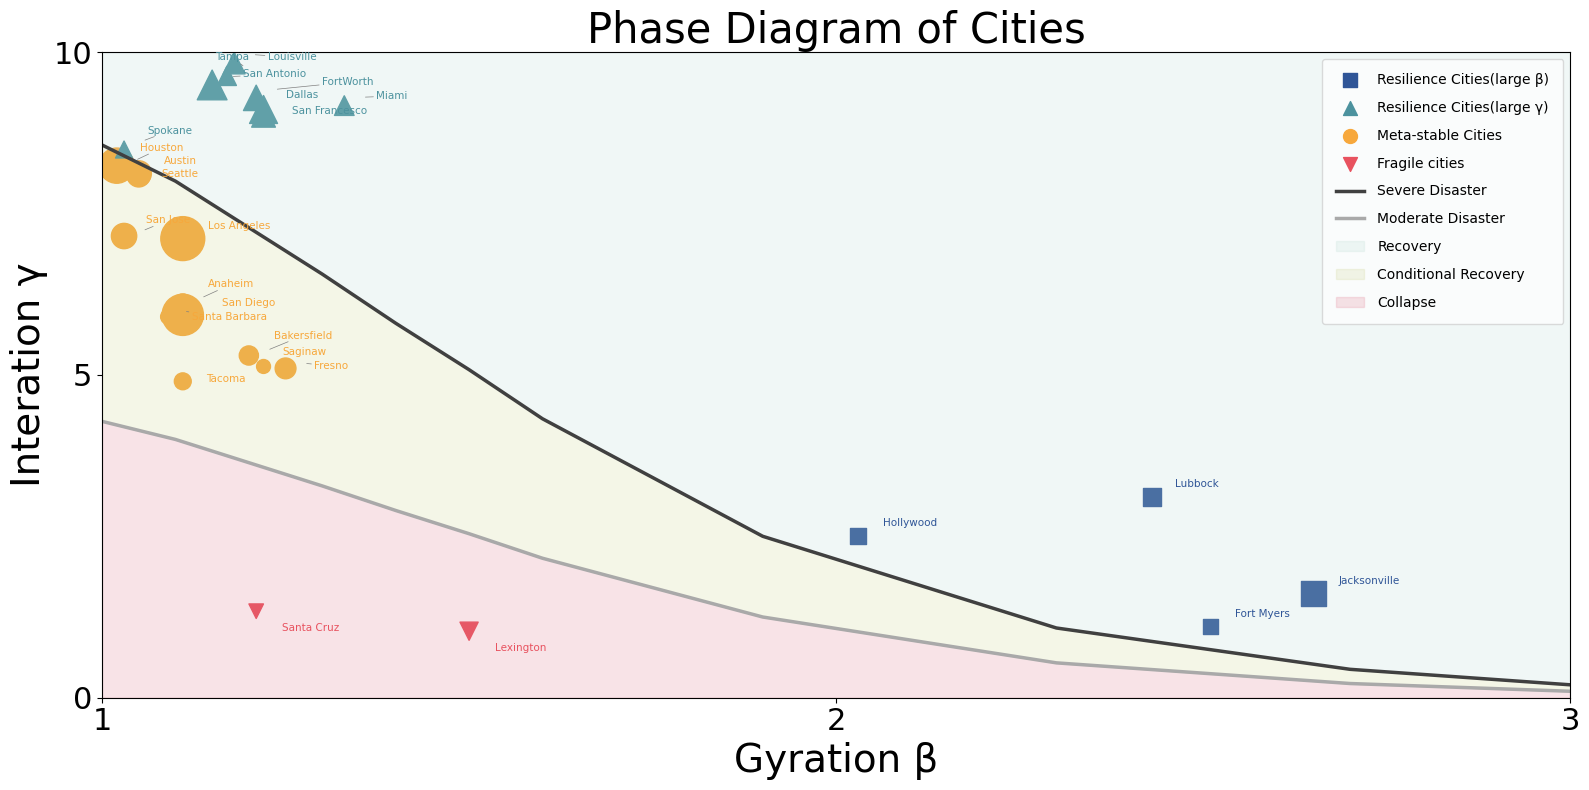

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from adjustText import adjust_text

# Load population data
df_population = pd.read_excel("./fig4.3/disaster-fig4.3-population.xlsx")
population_dict = dict(zip(df_population["city"], df_population["population"]))

# Read line plot data
df_line1 = pd.read_csv("./fig4.3/theory1.csv")
x_line1 = df_line1["x"]
y_line1 = df_line1["y"]
df_line2 = pd.read_csv("./fig4.3/theory2.csv")
x_line2 = df_line2["x"]
y_line2 = df_line2["y"]

# Read XLS file data
df_points = pd.read_excel("./fig4.3/PhaseDiagram.xls")
x_points = df_points["beta"]  # X axis corresponds to beta column
y_points = df_points["gamma"] # Y axis corresponds to gamma column
city_names = df_points["cities"] # Get city names column

# Calculate point sizes based on population (linear scaling)
min_size = 100
max_size = 1000
populations = np.array([population_dict[city] for city in city_names])
min_pop = populations.min()
max_pop = populations.max()
sizes = min_size + (max_size - min_size) * (populations - min_pop) / (max_pop - min_pop)

# Modify figsize to make the plot "fatter and shorter"
plt.figure(figsize=(16, 8))

# Plot first line
line1, = plt.plot(
    x_line1, y_line1,
    color="#A9A9A9",
    linestyle="-",
    linewidth=2.5,
    label="Moderate Disaster"
)

# Plot second line
line2, = plt.plot(
    x_line2, y_line2,
    color="#404040",
    linestyle="-",
    linewidth=2.5,
    label="Severe Disaster"
)

# Calculate Y values at points on both lines (via interpolation)
y_line1_at_points = np.interp(x_points, x_line1, y_line1)
y_line2_at_points = np.interp(x_points, x_line2, y_line2)

# --- Group and plot data points with city names ---
text_offset_x = 0.025
text_offset_y = 0.08
fontsize_city = 7.5
texts = []  # 用于存储所有文本标签对象

# Group: X axis > 2
mask_x_gt_2 = x_points > 2
x_gt_2_data = x_points[mask_x_gt_2]
y_gt_2_data = y_points[mask_x_gt_2]
cities_gt_2 = city_names[mask_x_gt_2]
sizes_gt_2 = sizes[mask_x_gt_2]
color_gt_2 = "#2F5597"

plt.scatter(
    x_gt_2_data, y_gt_2_data,
    color=color_gt_2,
    marker="s",
    s=sizes_gt_2,
    label="Region D (β > 2)"
)
for i in range(len(x_gt_2_data)):
    text = plt.text(
        x_gt_2_data.iloc[i] + text_offset_x,
        y_gt_2_data.iloc[i] + text_offset_y,
        cities_gt_2.iloc[i],
        color=color_gt_2,
        fontsize=fontsize_city,
        ha='left',
        va='bottom'
    )
    texts.append(text)

# Group: X axis <= 2
mask_x_leq_2 = x_points <= 2
x_leq_2_data = x_points[mask_x_leq_2]
y_leq_2_data = y_points[mask_x_leq_2]
cities_leq_2 = city_names[mask_x_leq_2]
y_line1_leq_2_interp = y_line1_at_points[mask_x_leq_2]
y_line2_leq_2_interp = y_line2_at_points[mask_x_leq_2]
sizes_leq_2 = sizes[mask_x_leq_2]

mask_below_theory1 = (y_leq_2_data < y_line1_leq_2_interp)
mask_between_theories = (y_leq_2_data >= y_line1_leq_2_interp) & (y_leq_2_data < y_line2_leq_2_interp)
mask_above_theory2 = (y_leq_2_data >= y_line2_leq_2_interp)

# Below theory1: Inverted triangle (v)
x_subset = x_leq_2_data[mask_below_theory1]
y_subset = y_leq_2_data[mask_below_theory1]
cities_subset = cities_leq_2[mask_below_theory1]
sizes_subset = sizes_leq_2[mask_below_theory1]
color_subset = "#E8525F"
plt.scatter(
    x_subset, y_subset,
    color=color_subset,
    marker="v",
    s=sizes_subset,
    label="Region A (γ < T1)"
)
for i in range(len(x_subset)):
    text = plt.text(
        x_subset.iloc[i] + text_offset_x,
        y_subset.iloc[i] - (text_offset_y + 0.1),
        cities_subset.iloc[i],
        color=color_subset,
        fontsize=fontsize_city,
        ha='left',
        va='top'
    )
    texts.append(text)

# Between theory1 and theory2: Circle (o)
x_subset = x_leq_2_data[mask_between_theories]
y_subset = y_leq_2_data[mask_between_theories]
cities_subset = cities_leq_2[mask_between_theories]
sizes_subset = sizes_leq_2[mask_between_theories]
color_subset = "#F7A83C"
plt.scatter(
    x_subset, y_subset,
    color=color_subset,
    marker="o",
    s=sizes_subset,
    label="Region B (T1 ≤ γ < T2)"
)
for i in range(len(x_subset)):
    text = plt.text(
        x_subset.iloc[i] + text_offset_x,
        y_subset.iloc[i] + text_offset_y,
        cities_subset.iloc[i],
        color=color_subset,
        fontsize=fontsize_city,
        ha='left',
        va='bottom'
    )
    texts.append(text)

# Above theory2: Upright triangle (^)
x_subset = x_leq_2_data[mask_above_theory2]
y_subset = y_leq_2_data[mask_above_theory2]
cities_subset = cities_leq_2[mask_above_theory2]
sizes_subset = sizes_leq_2[mask_above_theory2]
color_subset = "#4C929E"
plt.scatter(
    x_subset, y_subset,
    color=color_subset,
    marker="^",
    s=sizes_subset,
    label="Region C (γ ≥ T2)"
)
for i in range(len(x_subset)):
    text = plt.text(
        x_subset.iloc[i] + text_offset_x,
        y_subset.iloc[i] + text_offset_y + 0.05,
        cities_subset.iloc[i],
        color=color_subset,
        fontsize=fontsize_city,
        ha='left',
        va='bottom'
    )
    texts.append(text)

# Fill areas
fill2 = plt.fill_between(
    x_line2, y_line2, y2=10,
    color="#B8DAD2", alpha=0.2, label="Recovery"
)
fill1 = plt.fill_between(
    x_line1, y_line1, y2=0,
    color="#DE7487", alpha=0.2, label="Collapse"
)
fill_middle = plt.fill_between(
    x_line1, y_line1, y_line2,
    where=(y_line2 >= y_line1),
    color="#CBD289", alpha=0.2, label="Conditional Recovery"
)

# Set ticks and limits
plt.xlim(1, 3)
plt.xticks([1, 2, 3], fontsize=22)
plt.ylim(0, 10)
plt.yticks([0, 5, 10], fontsize=22)

# Add axis labels and title
plt.xlabel("Gyration β", fontsize=28)
plt.ylabel("Interation γ", fontsize=28)
plt.title("Phase Diagram of Cities", fontsize=30)

# 使用 adjustText 调整文本标签以避免重叠
adjust_text(
    texts,
    arrowprops=dict(arrowstyle="-", color='gray', lw=0.5)
)

# Create proxy artists for scatter plots with uniform size
proxy_region_d = plt.scatter([], [], color="#2F5597", marker="s", s=100, label="Resilience Cities(large β)")
proxy_region_c = plt.scatter([], [], color="#4C929E", marker="^", s=100, label="Resilience Cities(large γ)")
proxy_region_b = plt.scatter([], [], color="#F7A83C", marker="o", s=100, label="Meta-stable Cities")
proxy_region_a = plt.scatter([], [], color="#E8525F", marker="v", s=100, label="Fragile cities")


# Add legend with proxy artists and increased spacing
plt.legend(
    handles=[proxy_region_d, proxy_region_c, proxy_region_b, proxy_region_a, line2, line1, fill2, fill_middle, fill1],
    fontsize=10,
    loc="upper right",
    framealpha=0.7,
    labelspacing=1.0,
    handletextpad=1.0,
    borderpad=1.0
)

# Adjust layout to fit content
plt.tight_layout()

# Save the plot
plt.savefig("4.3_with_cities_population_scaled_linear_no_overlap_spaced_legend_swapped_regions.svg", format="svg", bbox_inches="tight")
plt.savefig("4.3_with_cities_population_scaled_linear_no_overlap_spaced_legend_swapped_regions.png", format="png", dpi=300, bbox_inches="tight")

# Save for artifact output
plt.savefig('phase_diagram_population_scaled_linear_no_overlap_spaced_legend_swapped_regions.png')